# TASK 1: Problem Statement

The dataset contains information about: 
1) Employee Salaries
2) Years of Experience

The goal of the project is that if you get a certain years of experience, we should be accurately able to predict the salary of the employee.

# TASK 2: Import Libraries and Dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the csv file
salary_df = pd.read_csv('salary.csv')

In [3]:
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
#printing the first seven rows
salary_df.head(7)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [5]:
#printing the last 7 rows
salary_df.tail(7)

,YearsExperience,Salary
28,10.3,122391
29,10.5,121872
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [6]:
#maximum value of salary
max_salary = salary_df['Salary'].max()
max_salary

139465

# Task 3: Exploratory Data Analysis and Visualization

1) Step 1: Check for null values
2) Step 2: Check for info of the dataframe -> column names, non-null values and datatypes
3) Step 3: Check the summary of the dataframe

In [7]:
#Checking for null values
#isnull() - gives true and false for null values
#.any() - returns True if there are any null values
salary_df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

<Axes: >

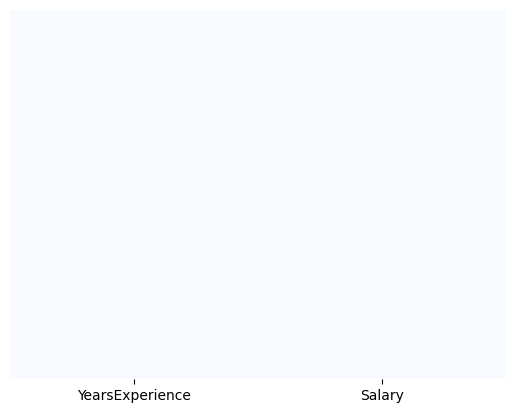

In [8]:
#Checking for null values using a heatmap
sns.heatmap(salary_df.isnull(), cbar = False, yticklabels = False, cmap = 'Blues')
#here you see everything is blue and there are no dark spots that means that there are no missing values

In [9]:
#info of the dataframe
#gives the info of the columns, non-null values and data types
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [10]:
#summary of the dataframe
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


## What are the number of years corresponding to employees with minimum and maximum years of experience?

In [11]:
#value of max_salary that was calculated before
max_salary

139465

In [12]:
#finding the number of years corresponding to maximum salary
salary_df_max = salary_df[salary_df['Salary'] == max_salary]
years_max_salary = salary_df_max['YearsExperience'].to_string(index=False)
print(years_max_salary)

13.5


In [13]:
#value of minimum salary
salary_min = salary_df['Salary'].min()
salary_min

37731

In [14]:
#finding the number of years corresponding to the minimum salary (in a dataframe form)
salary_df_min = salary_df[salary_df['Salary'] == salary_min]
salary_df_min

,YearsExperience,Salary
2,1.5,37731


Conclusion: Here we observe that someone who has worked for 1.1 years is actually making a little more than someone who has worked for 1.5 years.

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

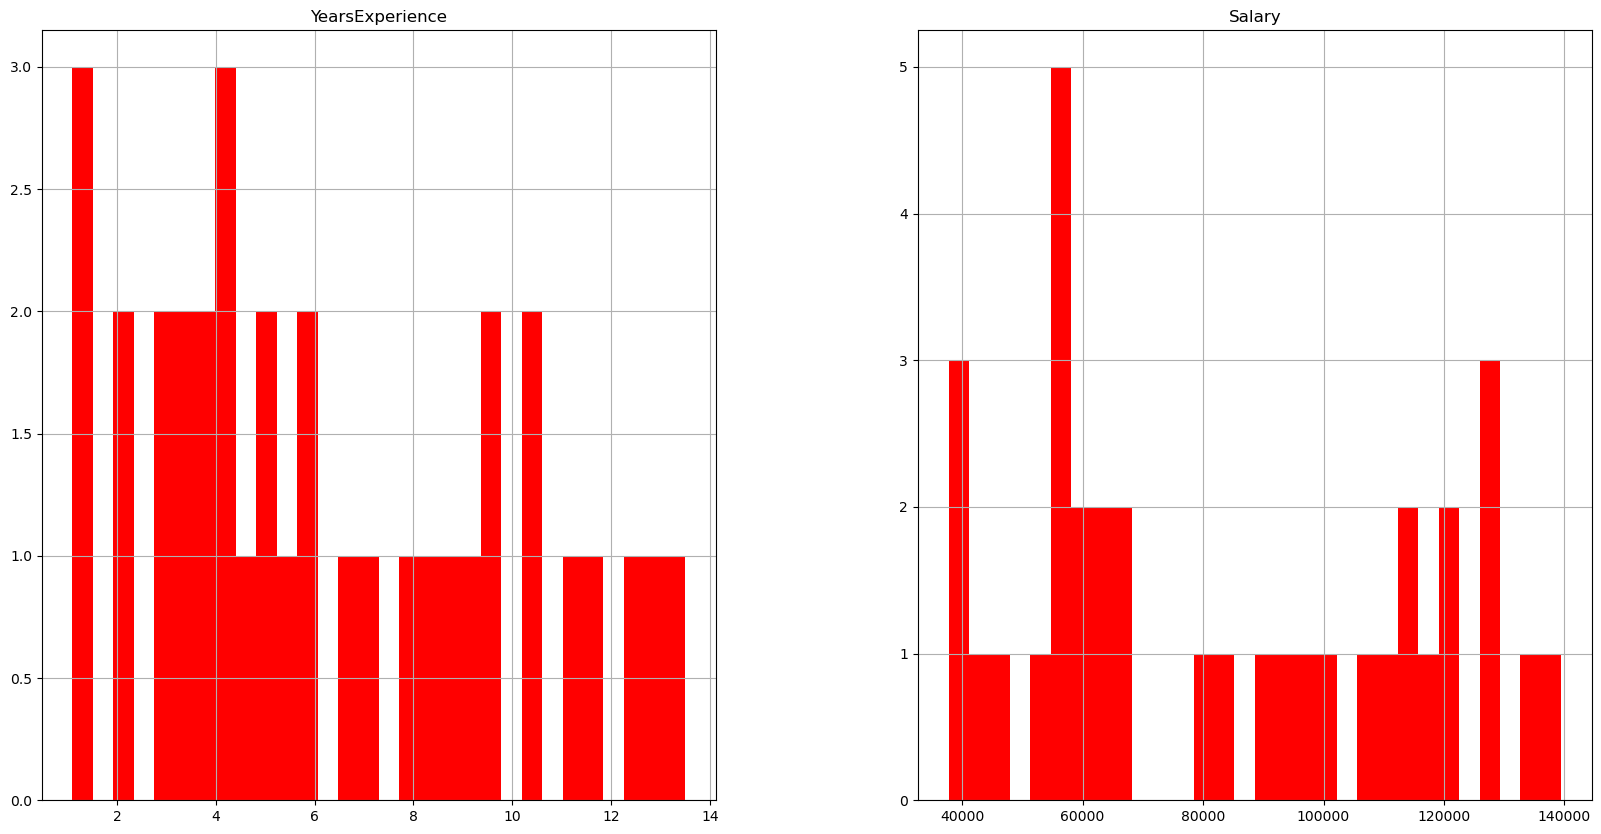

In [15]:
# plotting a histogram to see the distribution of all the columns in the dataset
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')

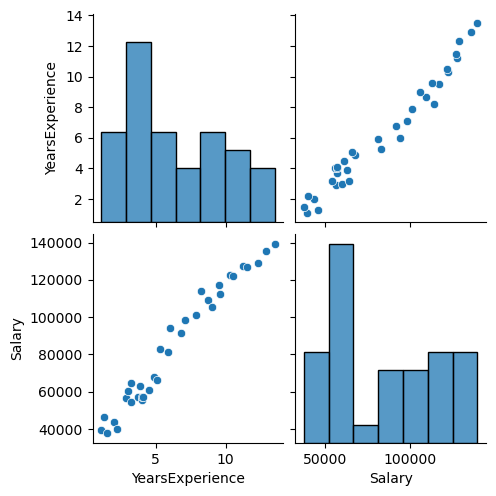

In [16]:
sns.pairplot(salary_df)

From the above figure we observe that as the years of experience increase the salary also increases.

In [17]:
#correlation matrix
corr_matrix = salary_df.corr()
corr_matrix

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


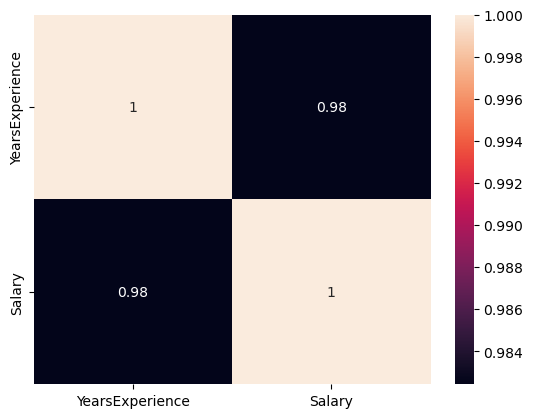

In [18]:
sns.heatmap(corr_matrix, annot = True)
plt.show() #removes the extra axes marker on the top

Using regplot in Seaborn below to obtain a straight line fit between "salary" and "years of experience" 

<Axes: xlabel='YearsExperience', ylabel='Salary'>

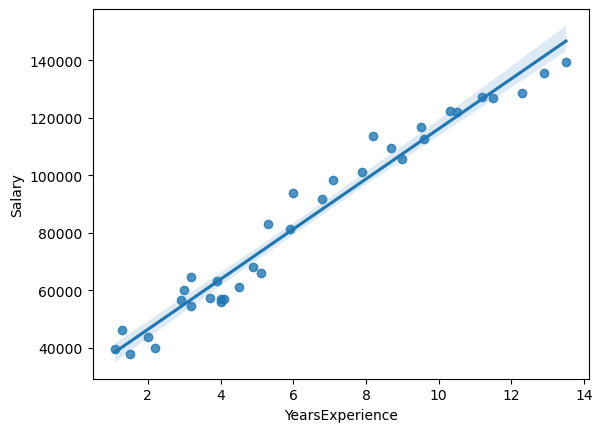

In [19]:
#regplot in seaborn is used to fit a straight line to the dataset
sns.regplot(x ='YearsExperience', y = 'Salary', data = salary_df)

# Task 4: Create a Training and Test dataset

In [20]:
#independent features
#represented by capital X
X = salary_df[['YearsExperience']]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [21]:
#dependent variables
#represented with small y
y = salary_df[['Salary']]
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [22]:
X.shape

(35, 1)

In [23]:
#ensuring that the shape of X and y are the same
y.shape

(35, 1)

In [24]:
#for linear learner algorithm in aws sagemaker you need the training and test data to be float values
#and in an np array
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [25]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [26]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.],
       [127345.],
       [126756.],
       [128765.],
       [135675.],
       [139465.]], dtype=float32)

In [46]:
#split into training and testing data (75% training and 25% test)
#train test split shuffles the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
X_train.shape

(28, 1)

In [48]:
X_test.shape

(7, 1)

In [49]:
y_train.shape

(28, 1)

# TASK 5: TRAIN A LINEAR REGRESSION MODEL IN SKLEARN (without sagemaker built in algorithm)

In [50]:
#using linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression(fit_intercept = True)
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [51]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.9721662402153015

In [53]:
print('Linear Model Coefficient (m):', regression_model_sklearn.coef_ )

Linear Model Coefficient (m): [[8977.923]]


In [54]:
print('Linear Model Intercept (b):', regression_model_sklearn.intercept_)

Linear Model Intercept (b): [26923.715]


## Making a model with fit_intercept = False
What does this do?
It makes the y intercept = 0 and forces the line to pass through the origin

In [58]:
#linear regression with fit intercept = 0

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn_no_intercept = LinearRegression(fit_intercept = False)
regression_model_sklearn_no_intercept.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [59]:
regression_model_sklearn_no_intercept_accuracy = regression_model_sklearn_no_intercept.score(X_test, y_test)
regression_model_sklearn_no_intercept_accuracy

0.6723827719688416

In [62]:
print('Linear Model Coefficient (m):', regression_model_sklearn_no_intercept.coef_ )

Linear Model Coefficient (m): [[12299.696]]


In [63]:
print('Linear Model Intercept (b):', regression_model_sklearn_no_intercept.intercept_)

Linear Model Intercept (b): 0.0


The model accuracy went down and we see that the model intercept is 0

# TASK 6: EVALUATE TRAINED MODEL PERFORMANCE

In [67]:
#get the values of y for X_test
y_predict = regression_model_sklearn.predict(X_test)
y_predict

array([[ 87973.59 ],
       [130169.83 ],
       [ 38595.016],
       [ 90666.97 ],
       [ 53857.484],
       [ 44879.562],
       [142738.92 ]], dtype=float32)

In [68]:
#the above values of y corresponding to X_test have 9 values same as the shape of the test set

Text(0.5, 1.0, 'Years of Exp v/s Salary')

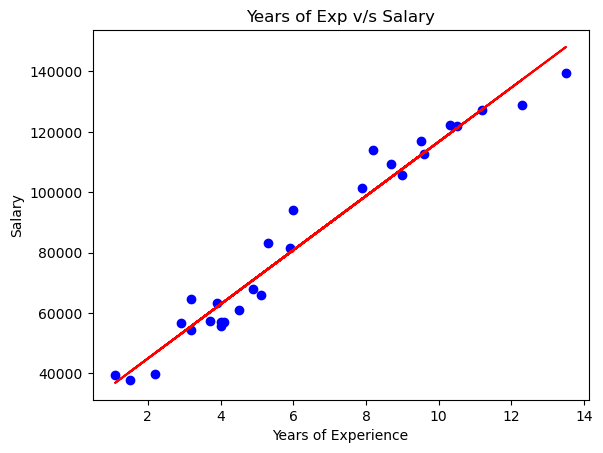

In [76]:
#plot the original X_train and y_train (original values of y)
plt.scatter(X_train, y_train, color = 'blue', label = 'Original Data')
#plot the original X_train and (predicted values of Y)
plt.plot(X_train, regression_model_sklearn.predict(X_train), color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Exp v/s Salary')

## Use the trained model to obtain a salary corresponding to 5 years of experience

In [77]:
num_years_exp = [[5]]

In [78]:
regression_model_sklearn.predict(num_years_exp)

array([[71813.32910156]])

# TASK 7: TRAIN LINEAR LEARNER MODEL IN AWS SAGEMAKER

## Step 1: Creating a Sagemaker session

In [80]:
#Boto3 is the Software Development Kit for Amazon Web Services.
# It allows Python developers to write software that makes use of services like S3 and EC2

import sagemaker
import boto3
from sagemaker import Session

In [82]:
#Create a Sagemaker session
sagemaker_session = sagemaker.Session()

#bucket = Session().default_bucket() #retrieves or creates a default bucket from your sagemaker 
bucket = 'sagemaker-learning-arusa'
prefix = 'linear-learner' #prefix is a subfolder within the bucket

role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::021891596868:role/service-role/AmazonSageMaker-ExecutionRole-20241124T124032


In [84]:
X_train.shape

(28, 1)

In [87]:
y_train = y_train[:,0] #converting to vector output

In [88]:
y_train.shape

(28,)

# Step 2: Converting data from numpy array to sagemaker linear learner supported formats (csv and record io). We convert to record io here

In [90]:
#the below code helps to convert the training data into record io format
#you can check the documentation to check why this is needed
#linear learner supports record io or csv formats 
import io
import sagemaker.amazon.common as smac #sagemaker common library
#this sagemaker common library helps to do this conversion to a different format

#the code below converts the data from numpy array format to record io format

buf = io.BytesIO() #creates an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0)

#when you write to in-memory byte arrays, it increments 1 every time you write to it
#lets reset that back to zero

0

# Step3: Getting the path to store the data

In [92]:
import os

#Code to upload data to RecordIO data to S3

#Key refers to the name of the file

key = 'linear-train-data'
#order of access - 1. bucket 2. folder inside that 3. key
#the following code uploads the data in record-io format to S3 bucket to be accessed later for train 
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

#lets print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-learning-arusa/linear-learner/train/linear-train-data


In [93]:
X_test.shape

(7, 1)

In [94]:
y_test.shape

(7, 1)

In [95]:
y_test = y_test[:,0]
y_test

array([ 91738., 126756.,  46205.,  98273.,  60150.,  43525., 135675.],
      dtype=float32)

In [96]:
y_test.shape

(7,)

In [97]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-learning-arusa/linear-learner/output


In [99]:
# This code is used to get the training container of sagemaker built-in algorithms (linear learner)
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [100]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32, #trains 32 models
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-11-29-03-01-06-855


2024-11-29 03:01:08 Starting - Starting the training job...
2024-11-29 03:01:23 Starting - Preparing the instances for training...
2024-11-29 03:01:44 Downloading - Downloading input data...
2024-11-29 03:02:19 Downloading - Downloading the training image......
2024-11-29 03:03:40 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/29/2024 03:03:49 INFO 140313100396352] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 

In [ ]:
# linear = sagemaker.estimator.Estimator(container,
#                                        role, 
#                                        train_instance_count = 1, 
#                                        train_instance_type = 'ml.c4.xlarge',
#                                        output_path = output_location,
#                                        sagemaker_session = sagemaker_session)

#to reduce the billable seconds add the below three lines
#train_use_spot_instances = True #allows users to use spot instances, helps companies to save money
#train_max_run = 300
#train_max_wait = 600

# TASK 8: DEPLOY MODEL and invoke endpoint in SAGEMAKER

In [101]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-11-29-04-01-11-241
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-11-29-04-01-11-241
INFO:sagemaker:Creating endpoint with name linear-learner-2024-11-29-04-01-11-241


-------!

In [103]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# Example usage
# Set the content type and serializer for your endpoint
linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = CSVSerializer()

# Set the deserializer for the response
linear_regressor.deserializer = JSONDeserializer()

In [104]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [105]:
result # results are in Json format

{'predictions': [{'score': 90257.3984375},
  {'score': 141065.4375},
  {'score': 30801.18359375},
  {'score': 93500.4609375},
  {'score': 49178.5625},
  {'score': 38368.33984375},
  {'score': 156199.75}]}